# Business Understanding

Valorant is a team-based first-person shooter videogame developed by Riot Games. Each team consists of five players, and the objective of the game is for the team to work together to win a total of 13 rounds against another enemy team. The game starts by randomly assigning the two competing teams to either an attacking or defending side. The goal of the attacking side to either defeat all the defenders or to successfully plant and detonate the bomb in any of the designated bomb sites. Likewise, the goal of the defending side is to either defeat all the attackers, prevent the attackers from planting the bomb within the time-limit, or to succesfully defuse the bomb planted by the attackers. The teams swap sides after twelve rounds (half-time), such that the attackers become defenders and vice-versa. There is also an in game economy where, in order to gain better weapons, the team must manage the money they earn each round and build a strategy to maintain their money. Hence, there are terms such as eco rounds where no one in the team buys during the rounds, semi-eco buys where teams would limit their spending to less than 1000 in-game currency for a round, semi-buys where teams would cut spending to greater than 1000 but less than 3500 in-game currency during the round, and finally a full buy where the team buys the weapons they want that is optimal to have a higher chance of success of winning the round.

Since its launch, the game has developed a growing e-sports scene. With high online-viewership and its highest tournament prize-pool reaching 1 million dollars, Valorant has gained the attention of sponsors and already-established e-sports organizations. Similar to regular sports, skilled players are being recruited by teams to increase chances of winning tournaments. Likewise, pre-planning and stratgizing is also an important part of ensuring tournament success. As such, there is an opportunity to use data in order to gain insight on the best strategies to implement to increase their chances of winning.

### Problem Statement:

We are an e-sports analytics team working for the team, Sentinels. We have been tasked to use data and analytics in order to increase the probabilities of the team winning tournaments.

### Business Questions:



How do we improve the Sentinels' team probability of success?
 - What is Sentinels' best map?
 - Which attributes/features can they adopt to increase their chances of winning?
  - Which agent nets the most value for each map? (value = ACS)
  - Who is the best agent for each player?
  - What can the team improve on for each round type? (performance on attack vs defense/ eco vs semibuy vs fullbuy)

**Average Combat Score (ACS) is deduced via averaging the sum of all round scores, in which round scores can be calculated using an equation that considers kills, multikills, and total damage inflicted*



# Data Understanding

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matches = "https://raw.githubusercontent.com/FranzHernandez/Valorant-Analytics-CSCI113/main/Matches.csv"
games = "https://raw.githubusercontent.com/FranzHernandez/Valorant-Analytics-CSCI113/main/Games.csv"
game_scoreboard = "https://raw.githubusercontent.com/FranzHernandez/Valorant-Analytics-CSCI113/main/Game_Scoreboard.csv"
game_rounds = "https://raw.githubusercontent.com/FranzHernandez/Valorant-Analytics-CSCI113/main/Game_Rounds.csv"

df_matches = pd.read_csv(matches)
df_games = pd.read_csv(games)
df_scoreboard = pd.read_csv(game_scoreboard)
df_rounds = pd.read_csv(game_rounds)

pd.options.display.max_columns = None

In [ ]:
df_matches.head()

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,62393,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,62403,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C),7046,7047,Bjor's Kittens,Mugiwara,2,0
2,62391,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (A),6461,6903,Akrew,Booster Seat Gaming,2,1
3,62396,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (B),6164,7043,Radiance,sameROFLMAO,2,0
4,62401,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (C),7045,7046,Salt and Vinegar,Bjor's Kittens,2,0


In [ ]:
df_games.head()

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team2_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,Team1_EcoWon,Team1_SemiEco,Team1_SemiEcoWon,Team1_SemiBuy,Team1_SemiBuyWon,Team1_FullBuy,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,defend,attack,7,6,0,5,2,0,2.0,2.0,2.0,0.0,0.0,5.0,3.0,13.0,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,Pho Real,2,13,defend,attack,2,0,0,10,3,0,0.0,3.0,0.0,3.0,0.0,5.0,1.0,4.0,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,attack,defend,8,5,0,4,4,0,1.0,2.0,1.0,2.0,1.0,5.0,2.0,12.0,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,defend,attack,7,6,0,5,1,0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,11.0,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,defend,attack,9,4,0,3,6,0,1.0,4.0,2.0,2.0,0.0,3.0,0.0,13.0,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


In [ ]:
df_scoreboard.head()

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,KAST_Percent,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,0.65,195.0,0.31,4.0,4.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,0.90,161.0,0.16,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,3712.0,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,0.85,148.0,0.27,3.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,5099.0,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,0.70,141.0,0.19,3.0,0.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,3983.0,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,0.70,55.0,0.22,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0


In [ ]:
df_rounds.head()

,GameID,Team1ID,Team2ID,RoundHistory
0,60894.0,6903,6020,"{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':..."
1,60895.0,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
2,60896.0,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
3,60924.0,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."
4,60925.0,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."


# Data Preparation

In [ ]:
df_matches = (df_matches[(df_matches.Team1ID == 2) | (df_matches.Team2ID == 2)])
df_matches = df_matches.drop(['Patch', 'Date'], axis = 1)
df_matches.head()

,MatchID,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
269,51276,449,VALORANT Champions,Group Stage: Decider (B),2,2355,Sentinels,KRÜ Esports,1,2
276,51274,449,VALORANT Champions,Group Stage: Winner's (B),474,2,Team Liquid,Sentinels,2,1
283,51273,449,VALORANT Champions,Group Stage: Opening (B),2,2406,Sentinels,FURIA,2,1
1427,34974,466,Valorant Champions Tour Stage 3: Masters Berlin,Playoffs: Quarterfinals,427,2,Envy,Sentinels,2,0
1431,35943,466,Valorant Champions Tour Stage 3: Masters Berlin,Group Stage: Group D,2,1670,Sentinels,F4Q,2,1


For df_matches, we filtered the dataset to only the matches where Sentinels is involved and we removed the patch and date columns

In [ ]:
#df_games = (df_games[(df_games.Team1ID == 2) | (df_games.Team2ID == 2)])
df_games.head()

#ignore missing values

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team2_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,Team1_EcoWon,Team1_SemiEco,Team1_SemiEcoWon,Team1_SemiBuy,Team1_SemiBuyWon,Team1_FullBuy,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,defend,attack,7,6,0,5,2,0,2.0,2.0,2.0,0.0,0.0,5.0,3.0,13.0,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,Pho Real,2,13,defend,attack,2,0,0,10,3,0,0.0,3.0,0.0,3.0,0.0,5.0,1.0,4.0,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,attack,defend,8,5,0,4,4,0,1.0,2.0,1.0,2.0,1.0,5.0,2.0,12.0,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,defend,attack,7,6,0,5,1,0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,11.0,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,defend,attack,9,4,0,3,6,0,1.0,4.0,2.0,2.0,0.0,3.0,0.0,13.0,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


In [ ]:
df_scoreboard = (df_scoreboard[(df_scoreboard.TeamAbbreviation == "SEN")])
df_scoreboard.dropna(subset=["Agent"], inplace=True)
df_scoreboard = df_scoreboard.drop(["KAST_Percent", "OnevOne", "OnevTwo", "OnevThree", "OnevFour", "OnevFive"], axis = 1)
df_scoreboard.drop(df_scoreboard[df_scoreboard.PlayerName == 'sinatraa'].index, inplace=True)
df_scoreboard.head()

#impute ADR and HS_percentage(mean per player)
#ignore rows with missing Num_K, First deaths, econs, plants, defuses

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,Econ,Plants,Defuses
5429,57930,46.0,ShahZaM,SEN,breach,279.0,23.0,11.0,5.0,12.0,171.0,0.14,3.0,1.0,2.0,5.0,2.0,0.0,0.0,64.0,1.0,0.0
5430,57930,45.0,SicK,SEN,skye,262.0,19.0,11.0,7.0,8.0,171.0,0.28,2.0,0.0,2.0,3.0,0.0,1.0,0.0,76.0,1.0,1.0
5431,57930,9.0,TenZ,SEN,jett,202.0,13.0,12.0,6.0,1.0,136.0,0.18,5.0,5.0,0.0,3.0,0.0,1.0,0.0,75.0,0.0,1.0
5432,57930,47.0,zombs,SEN,viper,202.0,14.0,15.0,7.0,-1.0,130.0,0.19,1.0,1.0,0.0,3.0,1.0,0.0,0.0,50.0,2.0,0.0
5433,57930,454.0,dapr,SEN,killjoy,172.0,13.0,11.0,6.0,2.0,112.0,0.09,1.0,1.0,0.0,3.0,0.0,0.0,0.0,48.0,1.0,0.0


In [ ]:
df_scoreboard.groupby(['PlayerName', 'Agent'])['ADR'].agg(['mean'], as_index=False).round(0)

mean
PlayerName Agent           
ShahZaM    breach     130.0
           jett       140.0
           skye       112.0
           sova       132.0
SicK       breach     127.0
           kayo       139.0
           phoenix    159.0
           raze       149.0
           sage       137.0
           skye       144.0
           sova       131.0
TenZ       jett       156.0
           raze       170.0
           reyna      167.0
           yoru       130.0
dapr       cypher     128.0
           killjoy    127.0
           sage       107.0
           sova       137.0
           viper      131.0
zombs      astra      113.0
           brimstone  116.0
           omen       112.0
           viper      119.0

In [ ]:
def adr_fill(cols):
    
    ADR = cols[0]
    PlayerName = cols[1]
    Agent = cols[2]

    meanADR = {"ShahZaM": {"breach": 130, "jett": 140, "skye": 112, "sova": 132}, 
               "SicK": {"breach": 127, "kayo": 139, "phoenix": 159, "raze": 149, "sage": 137, "skye": 144, "sova": 131},
               "TenZ": {"jett": 156, "raze": 170, "reyna": 167, "yoru": 130},
               "dapr": {"cypher": 128, "killjoy": 127, "sage": 107, "sova": 137, "viper": 131},
               "zombs": {"astra": 113, "brimstone": 116, "omen": 112, "viper": 119}}
    
    if pd.isnull(ADR): #if the ADR cell is null, follow the table above
      return meanADR[PlayerName][Agent]
            
    else: #if the ADR cell isn't null, just leave it as it is
        return ADR

In [ ]:
df_scoreboard.groupby(['PlayerName', 'Agent'])['HS_Percent'].agg(['mean'], as_index=False).round(2)

mean
PlayerName Agent          
ShahZaM    breach     0.22
           jett       0.22
           skye       0.20
           sova       0.24
SicK       breach     0.25
           kayo       0.21
           phoenix    0.26
           raze       0.21
           sage       0.23
           skye       0.24
           sova       0.27
TenZ       jett       0.20
           raze       0.15
           reyna      0.20
           yoru       0.20
dapr       cypher     0.20
           killjoy    0.15
           sage       0.24
           sova       0.20
           viper      0.17
zombs      astra      0.19
           brimstone  0.22
           omen       0.20
           viper      0.20

In [ ]:
def hs_fill(cols):
    
    hs_percent = cols[0]
    PlayerName = cols[1]
    Agent = cols[2]
    
    meanHS = {"ShahZaM": {"breach": 0.22, "jett": 0.22, "skye": 0.20, "sova": 0.24}, 
               "SicK": {"breach": 0.25, "kayo": 0.21, "phoenix": 0.26, "raze": 0.21, "sage": 0.23, "skye": 0.24, "sova": 0.27},
               "TenZ": {"jett": 0.20, "raze": 0.15, "reyna": 0.20, "yoru": 0.20},
               "dapr": {"cypher": 0.20, "killjoy": 0.15, "sage": 0.24, "sova": 0.20, "viper": 0.17},
               "zombs": {"astra": 0.19, "brimstone": 0.22, "omen": 0.20, "viper": 0.20}}

    if pd.isnull(hs_percent): #if the HS_Percent cell is null, follow the table above
        return meanHS[PlayerName][Agent]
            
    else: #if the HS_Percent cell isn't null, just leave it as it is
        return hs_percent

In [ ]:
df_scoreboard['ADR'] = df_scoreboard[['ADR','PlayerName','Agent']].apply(adr_fill, axis = 1)
df_scoreboard['HS_Percent'] = df_scoreboard[['HS_Percent','PlayerName','Agent']].apply(hs_fill, axis = 1)

In [ ]:
df_rounds = (df_rounds[(df_rounds.Team1ID == 2) | (df_rounds.Team2ID == 2)])
df_rounds.head()

#convert json to csv

,GameID,Team1ID,Team2ID,RoundHistory
544,57930.0,2,2355,"{1: {'RoundWinner': 'SEN', 'ScoreAfterRound': ..."
545,57931.0,2,2355,"{1: {'RoundWinner': 'KRÜ', 'ScoreAfterRound': ..."
546,57932.0,2,2355,"{1: {'RoundWinner': 'KRÜ', 'ScoreAfterRound': ..."
561,57924.0,474,2,"{1: {'RoundWinner': 'SEN', 'ScoreAfterRound': ..."
562,57925.0,474,2,"{1: {'RoundWinner': 'SEN', 'ScoreAfterRound': ..."


In [ ]:
df_rounds.dropna(inplace=True)
df_rounds.isna().sum()
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 544 to 14950
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameID        187 non-null    float64
 1   Team1ID       187 non-null    int64  
 2   Team2ID       187 non-null    int64  
 3   RoundHistory  187 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.3+ KB


In [ ]:
from pandas import json_normalize
import json
import ast

df_rounds_denormalized = pd.DataFrame()

for idx, row in df_rounds.iterrows():

  keys_values = ast.literal_eval(row["RoundHistory"]).items()

  jsonRounds = {str(int(row["GameID"])) + "-" +  str(key): value for key, value in keys_values}
  
  df_temp = pd.DataFrame.from_dict(jsonRounds, orient="index")

  df_temp["Team1ID"] = row["Team1ID"]
  df_temp["Team2ID"] = row["Team2ID"]
  df_temp["GameID"] = row["GameID"]
  
  df_rounds_denormalized = df_rounds_denormalized.append(df_temp)

df_rounds_denormalized.head(50)


,RoundWinner,ScoreAfterRound,WinType,Team1Bank,Team2Bank,Team1BuyType,Team2BuyType,Team1ID,Team2ID,GameID
57930-1,SEN,1-0,defuse,400.0,300.0,eco,eco,2,2355,57930.0
57930-2,SEN,2-0,elim,700.0,400.0,semi-buy,semi-buy,2,2355,57930.0
57930-3,KRÜ,2-1,boom,5700.0,7300.0,semi-buy,semi-eco,2,2355,57930.0
57930-4,SEN,3-1,defuse,300.0,2800.0,semi-buy,full-buy,2,2355,57930.0
57930-5,SEN,4-1,elim,1700.0,10200.0,semi-buy,semi-eco,2,2355,57930.0
57930-6,KRÜ,4-2,elim,12800.0,400.0,semi-buy,full-buy,2,2355,57930.0
57930-7,SEN,5-2,elim,700.0,4900.0,full-buy,full-buy,2,2355,57930.0
57930-8,SEN,6-2,elim,3800.0,10300.0,full-buy,semi-eco,2,2355,57930.0
57930-9,SEN,7-2,elim,16000.0,1300.0,full-buy,full-buy,2,2355,57930.0
57930-10,SEN,8-2,elim,22700.0,7500.0,full-buy,semi-eco,2,2355,57930.0


For df_rounds, we first removed all the games with missing round history data. Then we unraveled the JSON data under match history and denornmalized the dataset so that each row corresponds to a single round.

# Data Modeling

### Market Basket Analysis

Source: https://www.youtube.com/watch?v=0yaYwDyBxFA

In [ ]:
df_games2 = df_games
dataset = []
for index in range(len(df_games2)):
  x = []
  x.append(str(df_games2.iloc[index, 2]))
  x.append(str(df_games2.iloc[index, 7]))
  dataset.append(x)
print(dataset)

[['Breeze', 'Booster Seat Gaming'], ['Bind', 'Pho Real'], ['Haven', 'Booster Seat Gaming'], ['Icebox', "Bjor's Kittens"], ['Haven', "Bjor's Kittens"], ['Breeze', 'Booster Seat Gaming'], ['Bind', 'Akrew'], ['Haven', 'Akrew'], ['Breeze', 'Radiance'], ['Icebox', 'Radiance'], ['Ascent', 'Salt and Vinegar'], ['Haven', 'Salt and Vinegar'], ['Bind', 'Mugiwara'], ['Icebox', 'Mugiwara'], ['Haven', 'True Rippers'], ['Ascent', 'True Rippers'], ['Ascent', 'Akrew'], ['Bind', 'Akrew'], ['Icebox', 'Booster Seat Gaming'], ['Haven', 'Booster Seat Gaming'], ['Breeze', 'Radiance'], ['Ascent', 'Radiance'], ['Icebox', 'Kowareta'], ['Breeze', 'sameROFLMAO'], ['Ascent', 'sameROFLMAO'], ['Icebox', 'Salt and Vinegar'], ['Split', 'Salt and Vinegar'], ['Haven', "Bjor's Kittens"], ['Icebox', "Bjor's Kittens"], ['Icebox', 'Clarity Esports'], ['Haven', 'Clarity Esports'], ['Haven', 'Team Valor'], ['Icebox', 'FS Esports '], ['Split', 'Team Valor'], ['Bind', 'Kingsmen'], ['Split', 'BOOM Esports'], ['Breeze', 'Team Ex

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

In [ ]:
map_winner = pd.DataFrame(te_ary, columns=te.columns_)
map_winner

+22   +W party  -sheesh-  0 Training  100 Blifted  100 Thieves  \
0      False     False     False       False        False        False   
1      False     False     False       False        False        False   
2      False     False     False       False        False        False   
3      False     False     False       False        False        False   
4      False     False     False       False        False        False   
...      ...       ...       ...         ...          ...          ...   
15883  False     False     False       False        False        False   
15884  False     False     False       False        False        False   
15885  False     False     False       False        False        False   
15886  False     False     False       False        False        False   
15887  False     False     False       False        False        False   

       123TAP  1280x960    153  1620 Kings  19esports  1stCav eSport Club  \
0       False     False  False       False      False               False   
1       False     False  False       False      False               False   
2       False     False  False       False      False               False   
3       False     False  False       False      False               False   
4       False     False  False       False      False               False   
...       ...       ...    ...         ...        ...                 ...   
15883   False     False  False       False      False               False   
15884   False     False  False       False      False               False   
15885   False     False  False       False      False               False   
15886   False     False  False       False      False               False   
15887   False     False  False       False      False               False   

       200 Policemen  24Haven   2G4L  303 Esports  303 Esports Orange    368  \
0              False    False  False        False               False  False   
1              False    False  False        False               False  False   
2              False    False  False        False               False  False   
3              False    False  False        False               False  False   
4              False    False  False        False               False  False   
...              ...      ...    ...          ...                 ...    ...   
15883          False    False  False        False               False  False   
15884          False    False  False        False               False  False   
15885          False    False  False        False               False  False   
15886          False    False  False        False               False  False   
15887          False    False  False        False               False  False   

       3BL Esports  47 Gaming  5Dogs  5MOKES  5NOOBS    5gg  5ynerG  \
0            False      False  False   False   False  False   False   
1            False      False  False   False   False  False   False   
2            False      False  False   False   False  False   False   
3            False      False  False   False   False  False   False   
4            False      False  False   False   False  False   False   
...            ...        ...    ...     ...     ...    ...     ...   
15883        False      False  False   False   False  False   False   
15884        False      False  False   False   False  False   False   
15885        False      False  False   False   False  False   False   
15886        False      False  False   False   False  False   False   
15887        False      False  False   False   False  False   False   

       6045Pirates  99Percent.  99cents    9XL  9z Team   A$AP  \
0            False       False    False  False    False  False   
1            False       False    False  False    False  False   
2            False       False    False  False    False  False   
3            False       False    False  False    False  False   
4            False       False    False  False    

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(map_winner, min_support=0.001, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.006420,(100 Thieves)
1,0.001385,(19esports)
2,0.001196,(2G4L)
3,0.002455,(9z Team)
4,0.003273,(Absolute JUPITER)
...,...,...
453,0.002266,"(Sentinels, Split)"
454,0.001888,"(TSM, Split)"
455,0.001259,"(Velocity Gaming, Split)"
456,0.001196,"(XSET, Split)"


In [ ]:
from mlxtend.frequent_patterns import association_rules
mba = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.01)
mba = mba.sort_values(by=['confidence'], ascending=False).reset_index()
mba = mba.iloc[: , 1:]
mba

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(EXO Clan),(Bind),0.002392,0.211166,0.001070,0.447368,2.118566,0.000565,1.427415
1,(Opportunists),(Haven),0.002455,0.219474,0.001007,0.410256,1.869273,0.000468,1.323501
2,(DAMWON Gaming),(Bind),0.002706,0.211166,0.001070,0.395349,1.872221,0.000498,1.304611
3,(Mamba Mode Gaming),(Haven),0.002895,0.219474,0.001133,0.391304,1.782920,0.000497,1.282293
4,(HSDIRR),(Haven),0.002644,0.219474,0.001007,0.380952,1.735753,0.000427,1.260850
...,...,...,...,...,...,...,...,...,...
194,(Icebox),(Evil Geniuses),0.122356,0.004909,0.001259,0.010288,2.095600,0.000658,1.005435
195,(Icebox),(Fnatic),0.122356,0.004595,0.001259,0.010288,2.239134,0.000697,1.005753
196,(Icebox),(Gambit Esports),0.122356,0.005979,0.001259,0.010288,1.720598,0.000527,1.004353
197,(Ascent),(Built By Gamers),0.243328,0.007049,0.002455,0.010088,1.431047,0.000739,1.003070


# Data Analysis

### What is Sentinels' best map?

In [ ]:
df_games['Winner'].value_counts().head(10)

Renegades     192
Sentinels     178
TSM           171
Immortals     146
Cloud9        146
Soniqs        134
Gen.G         133
Envy          126
Complexity    125
G2 Esports    118
Name: Winner, dtype: int64

Given that Sentinels is in the top 10 winners of the games dataset, we can compare the amount of games they won to the other teams' and group them by map.

In [ ]:
df_games_top10 = df_games[(df_games.Winner == 'Sentinels') 
|(df_games.Winner == 'Renegades')
|(df_games.Winner == 'TSM')
|(df_games.Winner == 'Immortals')
|(df_games.Winner == 'Cloud9')
|(df_games.Winner == 'Soniqs')
|(df_games.Winner == 'Gen.G')
|(df_games.Winner == 'Envy')
|(df_games.Winner == 'Complexivity')
|(df_games.Winner == 'G2 Esports')
]
df_games_top10['Winner'] = df_games_top10['Winner'].str.strip("\'")
df_games_top10=df_games_top10.pivot_table(index='Map', columns ='Winner', aggfunc='size', fill_value=0)
df_games_top10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Winner,Cloud9,Envy,G2 Esports,Gen.G,Immortals,Renegades,Sentinels,Soniqs,TSM
Map,,,,,,,,,
Ascent,41,38,37,32,52,14,32,28,56
Bind,16,36,27,27,31,49,30,25,27
Breeze,7,1,4,4,1,11,4,8,3
Fracture,0,0,0,0,1,3,1,4,0
Haven,36,21,19,45,35,58,52,21,45
Icebox,18,10,14,10,15,21,22,41,9
Split,28,20,17,13,11,36,36,7,30
TBD,0,0,0,2,0,0,1,0,1


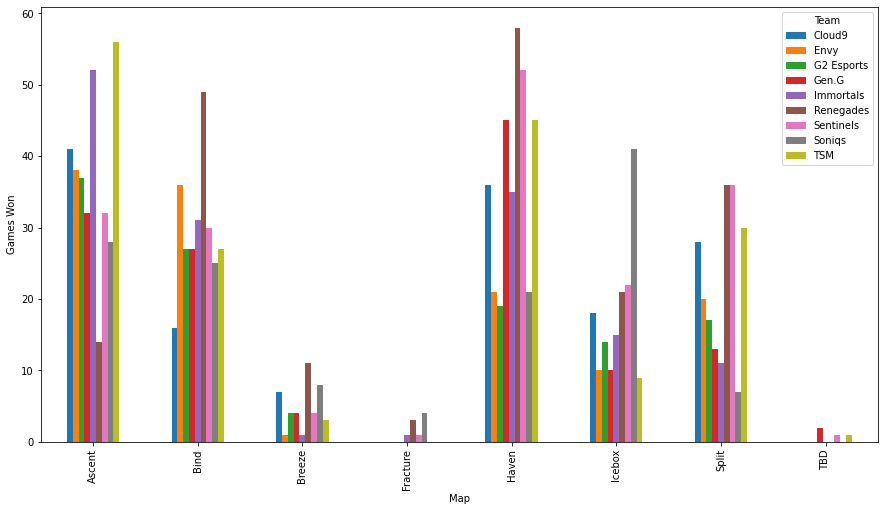

In [ ]:
df_games_top10.plot(kind='bar', figsize=(15, 8))
plt.ylabel('Games Won')
plt.legend(title='Team')
plt.show()

Looking at the bar chart above, we can see that Sentinels has its most wins in Haven. However, Renegades has the most wins in that map. This could lower their chances of winning here. We could also look at Split, but from the looks of it, they seem to be tied with Renegades. We can use a Market Basket Analysis to get a more accurate reading on Sentinel's chances based on the map.

In [ ]:
mba

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(EXO Clan),(Bind),0.002392,0.211166,0.001070,0.447368,2.118566,0.000565,1.427415
1,(Opportunists),(Haven),0.002455,0.219474,0.001007,0.410256,1.869273,0.000468,1.323501
2,(DAMWON Gaming),(Bind),0.002706,0.211166,0.001070,0.395349,1.872221,0.000498,1.304611
3,(Mamba Mode Gaming),(Haven),0.002895,0.219474,0.001133,0.391304,1.782920,0.000497,1.282293
4,(HSDIRR),(Haven),0.002644,0.219474,0.001007,0.380952,1.735753,0.000427,1.260850
...,...,...,...,...,...,...,...,...,...
194,(Icebox),(Evil Geniuses),0.122356,0.004909,0.001259,0.010288,2.095600,0.000658,1.005435
195,(Icebox),(Fnatic),0.122356,0.004595,0.001259,0.010288,2.239134,0.000697,1.005753
196,(Icebox),(Gambit Esports),0.122356,0.005979,0.001259,0.010288,1.720598,0.000527,1.004353
197,(Ascent),(Built By Gamers),0.243328,0.007049,0.002455,0.010088,1.431047,0.000739,1.003070


We can filter the results where Sentinels are the consequents of the maps.

In [ ]:
mba_sentinels = mba[mba['consequents'].astype(str).str.contains('Sentinels')]
mba_sentinels

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
174,(Split),(Sentinels),0.151561,0.011203,0.002266,0.014950,1.334428,0.000568,1.003804
175,(Haven),(Sentinels),0.219474,0.011203,0.003273,0.014913,1.331069,0.000814,1.003765
185,(Icebox),(Sentinels),0.122356,0.011203,0.001385,0.011317,1.010126,0.000014,1.000115


Given the top 3 maps (Split, Haven, and Icebox), let us compare Sentinel's chances at winning to the other teams'.

In [ ]:
mba_split = mba[mba['antecedents'].astype(str).str.contains('Split')]
mba_split

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
173,(Split),(Renegades),0.151561,0.012085,0.002266,0.014950,1.237126,0.000434,1.002909
174,(Split),(Sentinels),0.151561,0.011203,0.002266,0.014950,1.334428,0.000568,1.003804
182,(Split),(TSM),0.151561,0.010763,0.001888,0.012458,1.157545,0.000257,1.001717
183,(Split),(Paper Rex),0.151561,0.007364,0.001825,0.012043,1.635403,0.000709,1.004736
184,(Split),(Cloud9),0.151561,0.009189,0.001762,0.011628,1.265371,0.000370,1.002467
190,(Split),(Complexity),0.151561,0.007868,0.001574,0.010382,1.319601,0.000381,1.002541


In [ ]:
mba_haven = mba[mba['antecedents'].astype(str).str.contains('Haven')]
mba_haven

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
171,(Haven),(Renegades),0.219474,0.012085,0.003651,0.016633,1.376398,0.000998,1.004626
175,(Haven),(Sentinels),0.219474,0.011203,0.003273,0.014913,1.331069,0.000814,1.003765
180,(Haven),(Gen.G),0.219474,0.008371,0.002832,0.012905,1.541623,0.000995,1.004593
181,(Haven),(TSM),0.219474,0.010763,0.002832,0.012905,1.199040,0.000470,1.002170
191,(Haven),(NRG Esports),0.219474,0.007049,0.002266,0.010324,1.464542,0.000719,1.003309
192,(Haven),(Cloud9),0.219474,0.009189,0.002266,0.010324,1.123484,0.000249,1.001147
198,(Haven),(Immortals),0.219474,0.009189,0.002203,0.010037,1.092276,0.000186,1.000857


In [ ]:
mba_icebox = mba[mba['antecedents'].astype(str).str.contains('Icebox')]
mba_icebox

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
170,(Icebox),(Soniqs),0.122356,0.008434,0.002581,0.021091,2.500645,0.001549,1.012929
172,(Icebox),(Complexity),0.122356,0.007868,0.001888,0.015432,1.961481,0.000926,1.007683
178,(Icebox),(Paper Rex),0.122356,0.007364,0.001699,0.013889,1.886040,0.000798,1.006617
185,(Icebox),(Sentinels),0.122356,0.011203,0.001385,0.011317,1.010126,0.000014,1.000115
186,(Icebox),(Velocity Gaming),0.122356,0.006609,0.001385,0.011317,1.712404,0.000576,1.004762
187,(Icebox),(Renegades),0.122356,0.012085,0.001322,0.010802,0.893904,-0.000157,0.998704
193,(Icebox),(Andbox),0.122356,0.006546,0.001259,0.010288,1.571700,0.000458,1.003781
194,(Icebox),(Evil Geniuses),0.122356,0.004909,0.001259,0.010288,2.095600,0.000658,1.005435
195,(Icebox),(Fnatic),0.122356,0.004595,0.001259,0.010288,2.239134,0.000697,1.005753
196,(Icebox),(Gambit Esports),0.122356,0.005979,0.001259,0.010288,1.720598,0.000527,1.004353


Among the maps narrowed down, Sentinels has the best chances at Split because their confidence level for winning in that map is the highest. Even if the confidence level is tied with Renegades', it has a much higher lift, leverage, and conviction.

### Which attributes/features can they adopt to increase their chances of winning?

  - Which agent nets the most value for each map? (value = ACS)

In [ ]:
df_games_score = pd.merge(df_scoreboard, df_games, on = "GameID", how = "left")
df_games_score.head()

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,Econ,Plants,Defuses,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team2_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,Team1_EcoWon,Team1_SemiEco,Team1_SemiEcoWon,Team1_SemiBuy,Team1_SemiBuyWon,Team1_FullBuy,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,57930,46.0,ShahZaM,SEN,breach,279.0,23.0,11.0,5.0,12.0,171.0,0.14,3.0,1.0,2.0,5.0,2.0,0.0,0.0,64.0,1.0,0.0,51276,Fracture,2,2355,Sentinels,KRÜ Esports,Sentinels,13,7,defend,attack,9,4,0,3,4,0,2.0,2.0,2.0,2.0,1.0,7.0,4.0,9.0,6.0,0.0,2.0,0.0,5.0,2.0,5.0,3.0,8.0,2.0
1,57930,45.0,SicK,SEN,skye,262.0,19.0,11.0,7.0,8.0,171.0,0.28,2.0,0.0,2.0,3.0,0.0,1.0,0.0,76.0,1.0,1.0,51276,Fracture,2,2355,Sentinels,KRÜ Esports,Sentinels,13,7,defend,attack,9,4,0,3,4,0,2.0,2.0,2.0,2.0,1.0,7.0,4.0,9.0,6.0,0.0,2.0,0.0,5.0,2.0,5.0,3.0,8.0,2.0
2,57930,9.0,TenZ,SEN,jett,202.0,13.0,12.0,6.0,1.0,136.0,0.18,5.0,5.0,0.0,3.0,0.0,1.0,0.0,75.0,0.0,1.0,51276,Fracture,2,2355,Sentinels,KRÜ Esports,Sentinels,13,7,defend,attack,9,4,0,3,4,0,2.0,2.0,2.0,2.0,1.0,7.0,4.0,9.0,6.0,0.0,2.0,0.0,5.0,2.0,5.0,3.0,8.0,2.0
3,57930,47.0,zombs,SEN,viper,202.0,14.0,15.0,7.0,-1.0,130.0,0.19,1.0,1.0,0.0,3.0,1.0,0.0,0.0,50.0,2.0,0.0,51276,Fracture,2,2355,Sentinels,KRÜ Esports,Sentinels,13,7,defend,attack,9,4,0,3,4,0,2.0,2.0,2.0,2.0,1.0,7.0,4.0,9.0,6.0,0.0,2.0,0.0,5.0,2.0,5.0,3.0,8.0,2.0
4,57930,454.0,dapr,SEN,killjoy,172.0,13.0,11.0,6.0,2.0,112.0,0.09,1.0,1.0,0.0,3.0,0.0,0.0,0.0,48.0,1.0,0.0,51276,Fracture,2,2355,Sentinels,KRÜ Esports,Sentinels,13,7,defend,attack,9,4,0,3,4,0,2.0,2.0,2.0,2.0,1.0,7.0,4.0,9.0,6.0,0.0,2.0,0.0,5.0,2.0,5.0,3.0,8.0,2.0


In [ ]:
best_agent = df_games_score.groupby(['Map','Agent'])['ACS'].mean().round(0).unstack()
best_agent

Agent,astra,breach,brimstone,cypher,jett,kayo,killjoy,omen,phoenix,raze,reyna,sage,skye,sova,viper,yoru
Map,,,,,,,,,,,,,,,,
Ascent,160.0,213.0,117.0,209.0,249.0,204.0,222.0,168.0,259.0,NaN,NaN,224.0,185.0,186.0,NaN,NaN
Bind,197.0,173.0,196.0,205.0,369.0,NaN,NaN,166.0,NaN,236.0,307.0,213.0,148.0,206.0,198.0,202.0
Breeze,NaN,NaN,NaN,137.0,240.0,NaN,221.0,NaN,NaN,NaN,NaN,NaN,217.0,209.0,177.0,NaN
Fracture,NaN,279.0,NaN,NaN,202.0,NaN,172.0,NaN,NaN,NaN,NaN,NaN,262.0,NaN,202.0,NaN
Haven,164.0,256.0,174.0,209.0,242.0,NaN,178.0,169.0,247.0,NaN,NaN,219.0,216.0,206.0,NaN,NaN
Icebox,NaN,NaN,NaN,NaN,246.0,NaN,186.0,201.0,NaN,318.0,272.0,176.0,217.0,199.0,173.0,NaN
Split,174.0,NaN,NaN,205.0,224.0,NaN,227.0,175.0,NaN,226.0,259.0,232.0,190.0,NaN,225.0,NaN


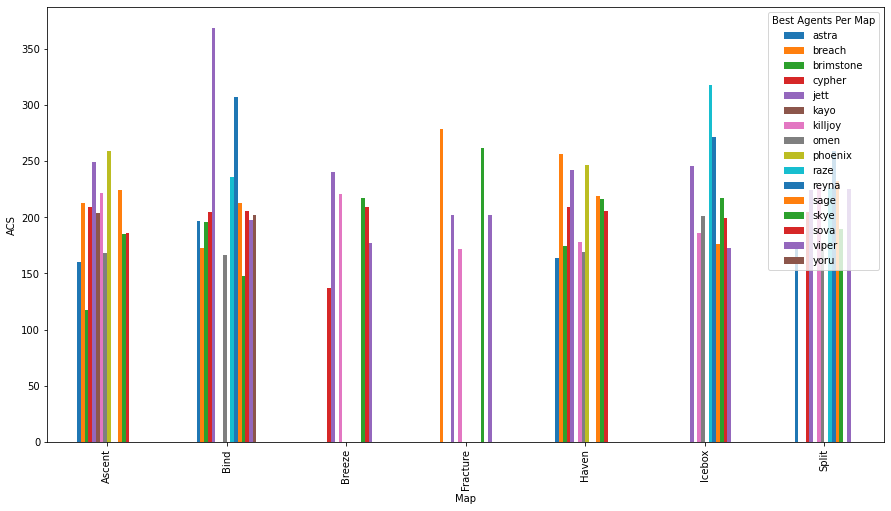

In [ ]:
best_agent.plot(kind='bar', figsize=(15, 8))
plt.ylabel('ACS')
plt.legend(title='Best Agents Per Map', loc = 'upper right')
plt.show()

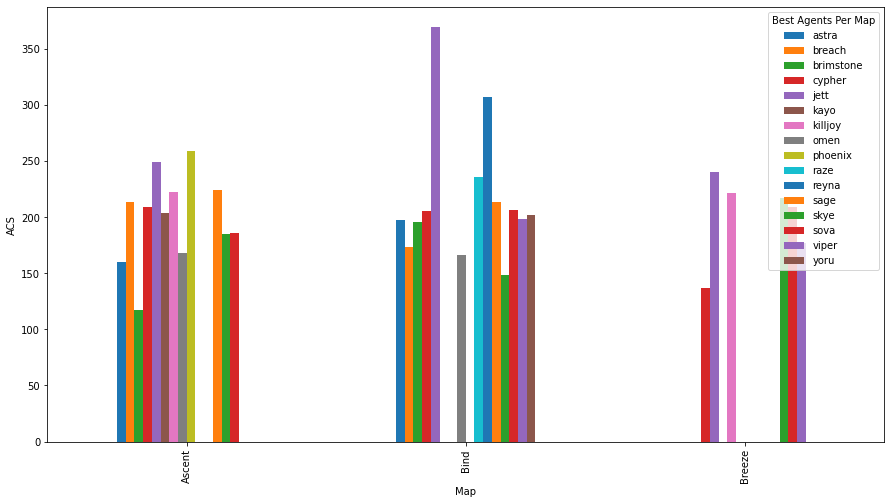

In [ ]:
map = df_games_score[(df_games_score.Map == 'Ascent')| (df_games_score.Map == 'Bind')| (df_games_score.Map == 'Breeze')].groupby(['Map','Agent'])['ACS'].mean().round(0).unstack()
map.plot(kind='bar', figsize=(15, 8))
plt.ylabel('ACS')
plt.legend(title='Best Agents Per Map', loc = 'upper right')
plt.show()

  - Who is the best agent for each player?


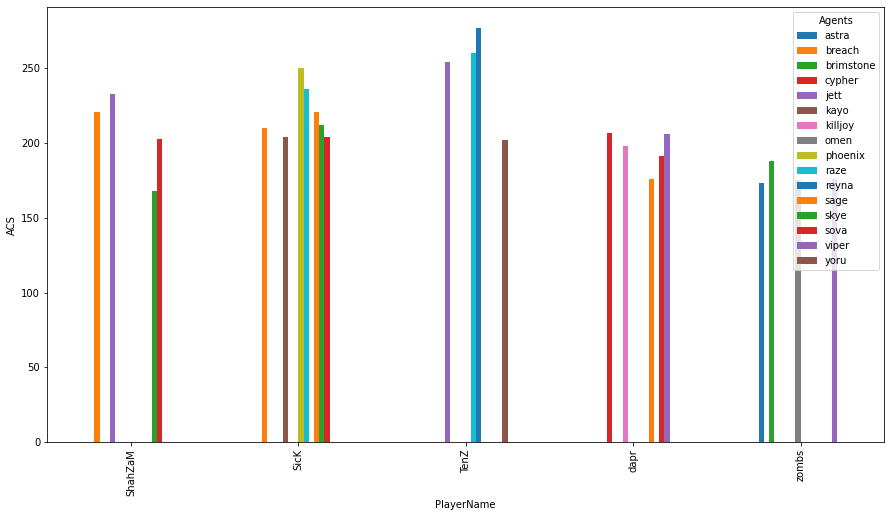

In [ ]:
a = df_scoreboard.groupby(['PlayerName', 'Agent'])['ACS'].mean().round(0).unstack()
a.plot(kind='bar', figsize=(15, 8))
plt.ylabel('ACS')
plt.legend(title='Agents', loc = 'upper right')
plt.show()

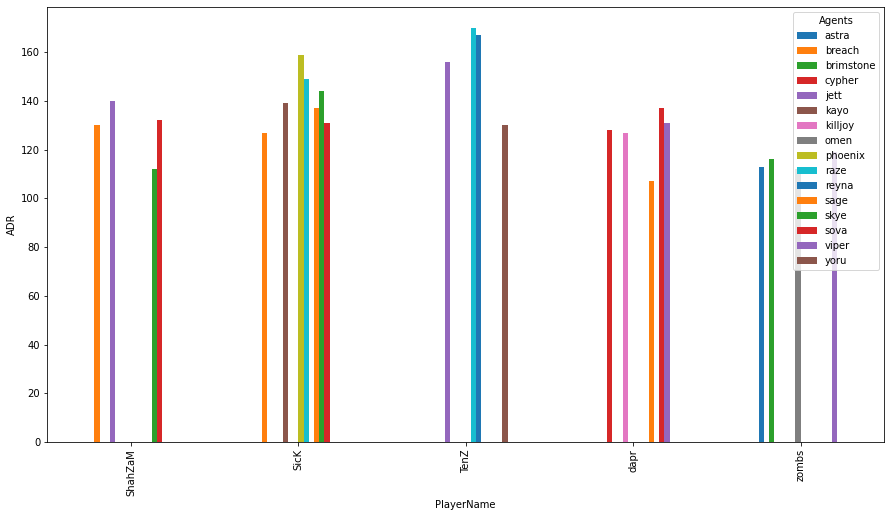

In [ ]:
a = df_scoreboard.groupby(['PlayerName', 'Agent'])['ADR'].mean().round(0).unstack()
a.plot(kind='bar', figsize=(15, 8))
plt.ylabel('ADR')
plt.legend(title='Agents', loc = 'upper right')
plt.show()

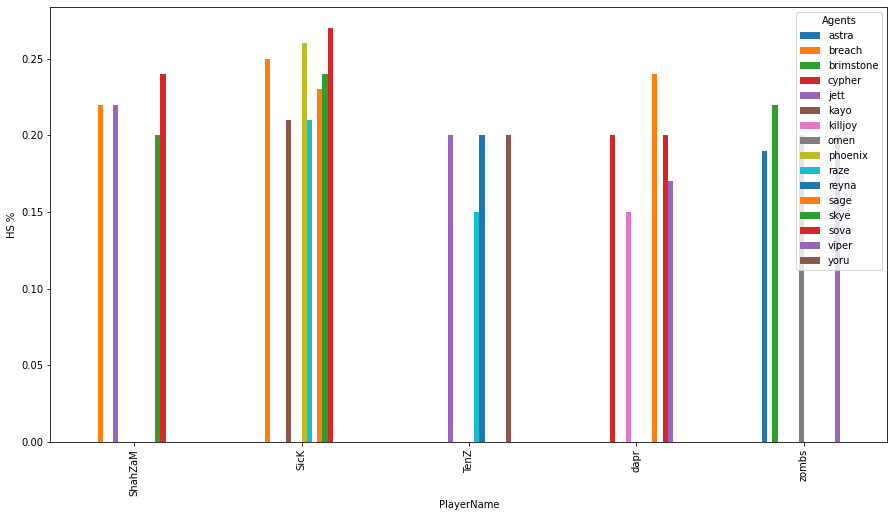

In [ ]:
a = df_scoreboard.groupby(['PlayerName', 'Agent'])['HS_Percent'].mean().round(2).unstack()
a.plot(kind='bar', figsize=(15, 8))
plt.ylabel('HS %')
plt.legend(title='Agents', loc = 'upper right')
plt.show()

  - What can the team improve on for each round type? (performance on attack vs defense/ eco vs semibuy vs fullbuy)


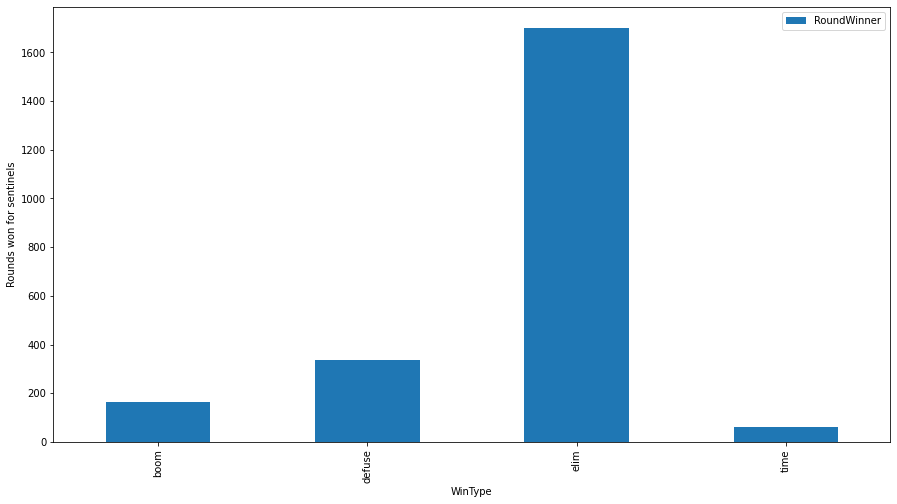

,RoundWinner,ScoreAfterRound,WinType,Team1Bank,Team2Bank,Team1BuyType,Team2BuyType,Team1ID,Team2ID,GameID
57930-1,SEN,1-0,defuse,400.0,300.0,eco,eco,2,2355,57930.0
57930-2,SEN,2-0,elim,700.0,400.0,semi-buy,semi-buy,2,2355,57930.0
57930-4,SEN,3-1,defuse,300.0,2800.0,semi-buy,full-buy,2,2355,57930.0
57930-5,SEN,4-1,elim,1700.0,10200.0,semi-buy,semi-eco,2,2355,57930.0
57930-7,SEN,5-2,elim,700.0,4900.0,full-buy,full-buy,2,2355,57930.0


In [ ]:
b = df_rounds_denormalized[df_rounds_denormalized["RoundWinner"] == "SEN"]
a = b.groupby(['WinType'])['RoundWinner'].count()
a.plot(kind='bar', figsize=(15, 8))
plt.ylabel('Rounds won for sentinels')
plt.legend( loc = 'upper right')
plt.show()
b.head()

In [ ]:
b = df_rounds_denormalized[df_rounds_denormalized["RoundWinner"]== "SEN"]
for idx, row in b.iterrows():
  if row["Team1ID"] == 2:
    b.loc[idx, "SenBuyType"] = row["Team1BuyType"]
  else:
    b.loc[idx,"SenBuyType"] = row["Team2BuyType"]

b

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,RoundWinner,ScoreAfterRound,WinType,Team1Bank,Team2Bank,Team1BuyType,Team2BuyType,Team1ID,Team2ID,GameID,SenBuyType
57930-1,SEN,1-0,defuse,400.0,300.0,eco,eco,2,2355,57930.0,eco
57930-2,SEN,2-0,elim,700.0,400.0,semi-buy,semi-buy,2,2355,57930.0,semi-buy
57930-4,SEN,3-1,defuse,300.0,2800.0,semi-buy,full-buy,2,2355,57930.0,semi-buy
57930-5,SEN,4-1,elim,1700.0,10200.0,semi-buy,semi-eco,2,2355,57930.0,semi-buy
57930-7,SEN,5-2,elim,700.0,4900.0,full-buy,full-buy,2,2355,57930.0,full-buy
...,...,...,...,...,...,...,...,...,...,...,...
2446-12,SEN,9-3,elim,8000.0,1000.0,full-buy,semi-buy,2,17,2446.0,full-buy
2446-15,SEN,10-5,elim,700.0,7200.0,full-buy,semi-buy,2,17,2446.0,full-buy
2446-17,SEN,11-6,elim,900.0,3000.0,semi-buy,full-buy,2,17,2446.0,semi-buy
2446-18,SEN,12-6,elim,12200.0,700.0,semi-buy,semi-buy,2,17,2446.0,semi-buy


Text(0.5, 1.0, 'Counted Rounds won with Buy Type')

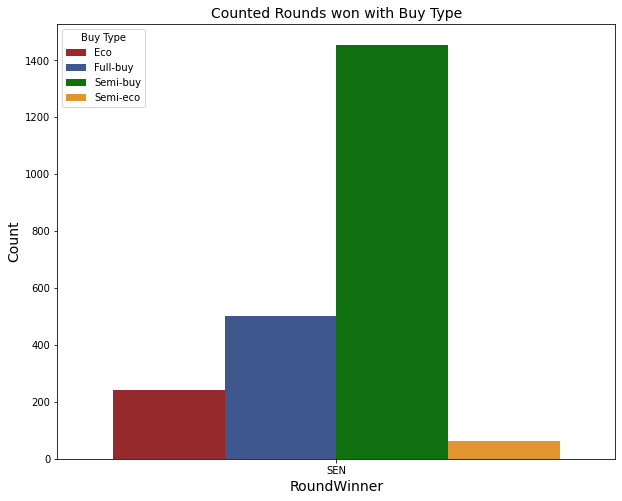

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.countplot(x = 'RoundWinner', data = b, hue = 'SenBuyType', palette = ['#A7171A', '#315399', '#008000', '#FF9912'	], ax=ax)
ax.set_xlabel('RoundWinner', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
mylabels = ['Eco', 'Full-buy', 'Semi-buy', 'Semi-eco']
ax.legend(title= 'Buy Type',labels = mylabels, loc = 'upper left')
plt.title('Counted Rounds won with Buy Type', fontsize = 14)

# Insights and Recommendations



# How do we improve the Sentinels' team probability of success?

### What is Sentinels' best map?
> Based on our analyses, Sentinels has the most wins in Haven, but they may face tough competition due to Renegades’ exceedingly good performance and win rate in the same map. To account for this, the group used Market Basket Analysis to assess which map would increase their chances of winning relative to the performance of competitor teams.  Based from the results, the top three maps that Sentinels play on the best are Split, Haven, and Icebox, with a confidence of 0.014950, 0.014913, and 0.011317 respectively. We’d recommend that Sentinels pick these maps more often during tournaments if they want to maximize their team’s probability of winning.



## Which attributes/features can they adopt to increase their chances of winning?

> ### Which agent nets the most value for each map? (value = ACS)

>> To determine the best agents to pick during a game, we looked at which agents net the most value for each map and for each player. The value for each agent is determined via the average ACS(Average Combat Score) of the corresponding agent grouped according to map and player in Sentinels. ACS is a metric given to each player at the end of game that summarize a player’s performance via their kills, damage, and non-damaging assists.

>>The group recommends to get the best two agents for each character role for a strong and balanced roster:
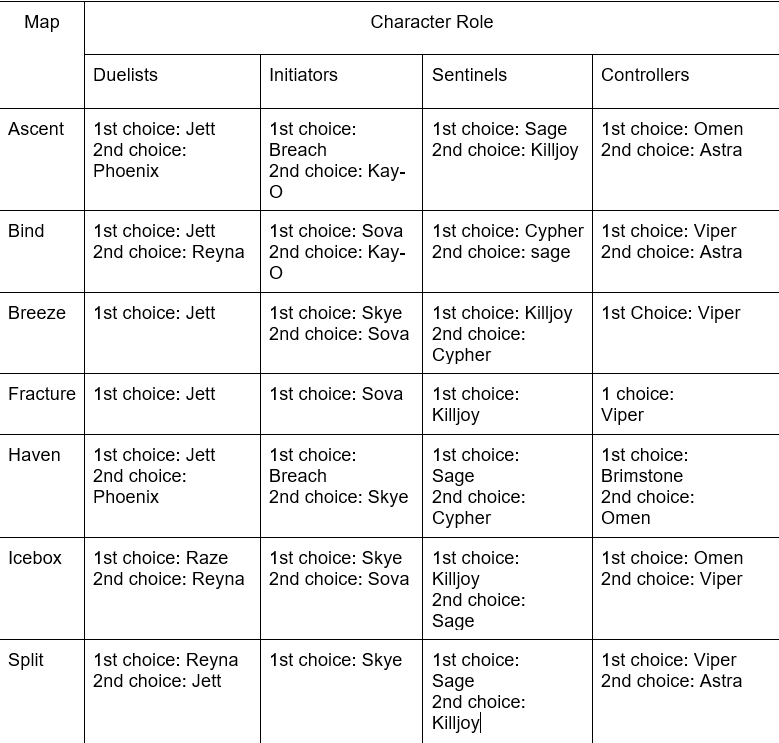

> ### Who is the best agent for each player?
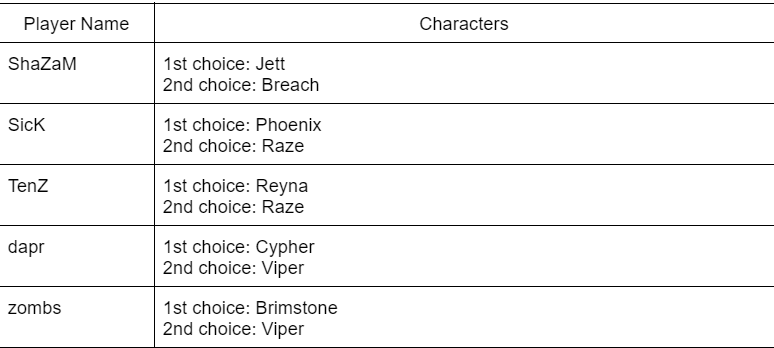
> ### What can the team improve on for each round type? (performance on attack vs defense/ eco vs semibuy vs fullbuy)


>> In Valorant, there are four ways to win a round. Firstly, a team can win a round by eliminating all of the members of the opposing team. Secondly, the defending team can win a round by preventing the enemy team from planting the bomb within the round’s time limit. Third, the defending team can win the round by defusing the bomb planted by the attackers. Finally, the attacking team can win a round by planting and detonating the bomb. The majority of the Sentinel team’s round wins are through elimination win types. Thus we recommend the team to capitalize on more aggressive playstyles and strategies to win their games.

> ### Which round type does the team need to work on?
>> There is also an in game-economy as previously mentioned above. For what the team can improve on for each round type, the group recommends for Sentinels to avoid doing Semi-eco buy. As what the graph shows, Sentinels has a better chance of winning Eco rounds more than Semi-eco ones. It would be more optimal to just save more money for the next round and increase their odds of winning. 

> ### Recommendations for future analyses
>>Possible improvements for future analyses could be the consideration of the game’s patch as game updates and character and map changes certainly have an effect on how professional players play the game.
